# Entanglement Simulation with Qiskit
## Import Required Libraries

We start by importing Qiskit (for quantum circuits), NumPy (for math operations), and Matplotlib (for visualizations).

In [28]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix, Statevector, Pauli, partial_trace, entropy, concurrence, purity, entanglement_of_formation
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

### Density Matrix
- **Definition:** A mathematical object that describes the state of a quantum system, including both pure and mixed states.  
<!-- - **Formula:**  
  - For a pure state $|\psi\rangle$:  
    $\rho = |\psi\rangle \langle \psi|$  
  - For a mixed state (statistical ensemble $\{p_i, |\psi_i\rangle\}$):  
    $\rho = \sum_i p_i |\psi_i\rangle \langle \psi_i|$, where $p_i \geq 0$ and $\sum_i p_i = 1$   -->
<!-- - **Properties:**  
  - Hermitian: $\rho^\dagger = \rho$  
  - Positive semi-definite: $\rho \geq 0$  
  - Trace one: $\mathrm{Tr}(\rho) = 1$  -->

In [29]:
# function to generate parametrized bell circuit. 
# A function in programming is basically a named block of code that you can reuse to perform a specific task

def fn_circ(theta): #Define a function named as fn_circ. It takes one parameter theta, which will be used to control a rotation of a qubit. 
    #This function will generate a 2-qubit quantum circuit and return its density matrix.
    qc = QuantumCircuit(2)
    # qc.h(1)
    qc.ry(theta,0)
    qc.cx(0,1)
# density matrix corresponding to state generated (2 qubit) using density matrix class
    rho = DensityMatrix(qc)
    return qc, rho

### Visualizing the Circuit

Here we draw the circuit generated for the chosen parameter value.

In [30]:
# fn_circ(0) : This calls the function fn_circ with the parameter value 0
# The [0] selects the first item from what the function return
fn_circ(0)[0]

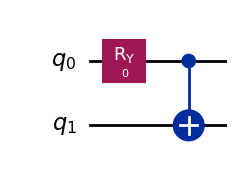

In [31]:
fn_circ(0)[0].draw('mpl')

In [32]:
fn_circ(0)[1]

DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


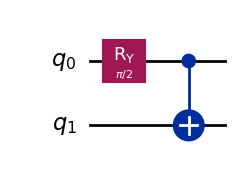

In [33]:
# Visualizing the Circuit for a different parameter value
fn_circ(np.pi/2)[0].draw('mpl')

In [34]:
fn_circ(np.pi/2)[1]

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


### Pure State
- **Definition:** A quantum state that can be described by a single vector $|\psi\rangle$.  
- **Density matrix:** $\rho = |\psi\rangle\langle\psi|$  
- **Property:** $\mathrm{Tr}(\rho^2) = 1$ (maximum purity).  
- **Example:** $|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$  

### Mixed State
- **Definition:** A quantum state that represents a **probabilistic mixture** of pure states.  
- **Density matrix:** $\rho = \sum_i p_i |\psi_i\rangle \langle \psi_i|$, with more than one $p_i \neq 0$.  
- **Property:** $\mathrm{Tr}(\rho^2) < 1$ (not completely pure).  
- **Example:** $\rho = \tfrac{1}{2}|0\rangle\langle0| + \tfrac{1}{2}|1\rangle\langle1|$  


In [35]:
#purity function
purity(fn_circ(0)[1])

np.complex128(1+0j)

In [36]:
purity(fn_circ(np.pi/2)[1])

np.complex128(1+0j)

##  Standard Bell State Circuit

Now we build a standard Bell state circuit using:
- A **Hadamard gate** on the first qubit.
- A **CNOT gate** to entangle it with the second qubit.

We then compute its density matrix.

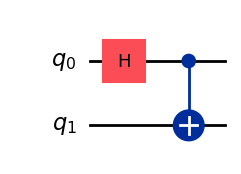

In [37]:
qc1 = QuantumCircuit(2)
qc1.h(0)
# qc1.h(1)
# qc1.ry(theta,0)
qc1.cx(0,1)

qc1.draw('mpl')

In [38]:
# density matrix corresponding to state generated (2 qubit)
rho1 = DensityMatrix(qc1)
rho1

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


In [39]:
#partial tarce : returns the reduced density matrix, qargs=[0]: the qubits listed in qargs are kept, and the rest are traced out.   
partial_trace(state=rho1, qargs=[0])

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [40]:
purity(partial_trace(state=rho1, qargs=[0]))

np.complex128(0.4999999999999998+0j)

# Previous example

In [41]:
#partial tarce for param=0, qubit 0
partial_trace(state=fn_circ(0)[1], qargs=[0])


DensityMatrix([[1.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j]],
              dims=(2,))


In [42]:
purity(partial_trace(state=fn_circ(0)[1], qargs=[0]))

np.complex128(1+0j)

In [43]:
#partial tarce for param=0, qubit 1
partial_trace(state=fn_circ(0)[1], qargs=[1])

DensityMatrix([[1.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j]],
              dims=(2,))


In [44]:
purity(partial_trace(state=fn_circ(0)[1], qargs=[1]))

np.complex128(1+0j)

In [45]:
#partial tarce for param=pi/2, qubit 0
partial_trace(state=fn_circ(np.pi/2)[1], qargs=[0])

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [46]:
purity(partial_trace(state=fn_circ(np.pi/2)[1], qargs=[0]))

np.complex128(0.5+0j)

In [47]:
#partial tarce for param=pi/2, qubit 1
partial_trace(state=fn_circ(np.pi/2)[1], qargs=[1])

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [48]:
purity(partial_trace(state=fn_circ(np.pi/2)[1], qargs=[1]))

np.complex128(0.5+0j)

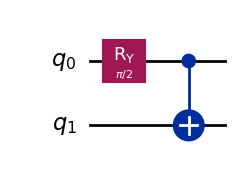

In [49]:
fn_circ(np.pi/2)[0].draw('mpl')

In [50]:
fn_circ(np.pi/2)[1]

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


In [51]:
# qiskit inbuilt function 
theta = np.arange(0,np.pi/2,0.1)        #generates angles from 0 to pi/2 in increments of 0.1
rho_mat = []                            #Initializes an empty Python list to store rho corresponding to each theta
for i in range(len(theta)):             #Loops over all indices of the theta array
        qc,rho =fn_circ(theta[i])       #Calls fn_circ with the current theta[i] and returns two objects
        rho_mat.append(rho)             #Appends the density matrix rho to the list rho_mat


### von-Neumann entropy
- **Definition:** A measure of the “uncertainty” or **mixedness** of a quantum state.  
- **Formula:**  
  $$
  S(\rho) = - \mathrm{Tr}(\rho \log \rho)
  $$  
- **Properties:**  
  - $S(\rho) = 0$ for pure states.  
  - Larger entropy $\Rightarrow$ more mixed.  
  - For bipartite pure states, the entropy of a subsystem quantifies **entanglement**.  

In [52]:
#von-Neumann entropy 
sa=[]                                                           #Initializes an empty list to store entropy values
for i in range(len(theta)):
        rho_0=partial_trace(state=rho_mat[i], qargs=[0])      #Computes the reduced density matrix for qubit 0 for all theta values
        en=entropy(rho_0)                                     #Computes the von Neumann entropy of the reduced density matrix using Qiskit's built-in entropy function
        sa.append(en)                                         #Appends the computed entropy value to the list sa

Text(0, 0.5, '$S(\\rho)$')

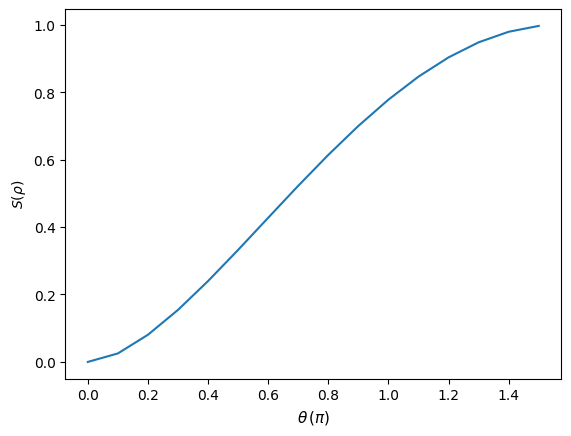

In [53]:
plt.plot(theta, sa)
plt.xlabel(r"$\theta \, (\pi)$", fontsize=11)
plt.ylabel(r"$S(\rho)$")

### Entanglement of Formation (EoF)
- **Definition:** The minimum number of maximally entangled pairs (Bell states) needed to create a given mixed state using local operations and classical communication (LOCC).  
- **Formula (for two qubits):**  
  $$
  E_f(\rho) = h\!\left(\tfrac{1+\sqrt{1-C^2}}{2}\right)
  $$  
  where $C$ = concurrence, and $h(x)$ is the binary entropy:  
  $$
  h(x) = -x \log_2 x - (1-x)\log_2 (1-x)
  $$  
- **Range:** $0 \leq E_f \leq 1$  
  - $E_f=0$: separable (no entanglement)  
  - $E_f=1$: maximally entangled (Bell pair).  

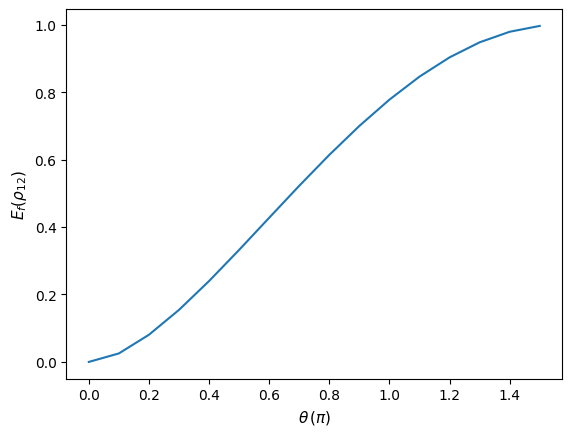

In [54]:
# is there any difference ?
ef=[]
for i in range(len(theta)):
        # rho_0=partial_trace(state=den_mat[i], qargs=[0])      
        e= entanglement_of_formation(rho_mat[i])
        ef.append(e)

plt.plot(theta, ef)
plt.xlabel(r"$\theta \, (\pi)$", fontsize=11)
plt.ylabel(r"$E_{f}(\rho_{12})$", fontsize=11);

# Create a Parameterized Bell-State Circuit

We define a function `fn_circ(theta)` that:
- Creates a 2-qubit circuit.
- Applies a **rotation (Ry)** on the first qubit.
- Applies a **CNOT** to entangle the two qubits.

It returns:
- The quantum circuit.
- The density matrix of the 2-qubit state.

### Concurrence
- **Definition:** A measure of entanglement for **two-qubit states**.  
- **Formula:** For density matrix $\rho$:  
  $$
  C(\rho) = \max \big( 0, \lambda_1 - \lambda_2 - \lambda_3 - \lambda_4 \big)
  $$  
  where $\lambda_i$ are the eigenvalues (in decreasing order) of  
  $$
  R = \sqrt{ \sqrt{\rho} \, \tilde{\rho} \, \sqrt{\rho} }
  $$  
  with $\tilde{\rho} = (\sigma_y \otimes \sigma_y)\, \rho^* \, (\sigma_y \otimes \sigma_y)$  
- **Range:** $0 \leq C \leq 1$  
  - $C=0$: separable state  
  - $C=1$: maximally entangled state  

  or 


### Concurrence
- **Definition:** A measure of entanglement for **two-qubit states**.  
- **Formula:** For density matrix $\rho$:  
  $$
  C(\rho) = \max \big( 0, \sqrt{\lambda_1 }- \sqrt{\lambda_2} - \sqrt{\lambda_3} - \sqrt{\lambda_4 }\big)
  $$  
  where $\lambda_i$ are the eigenvalues (in decreasing order) of  
  $$
  R =  \rho \, \tilde{\rho} \
  $$  
  with $\tilde{\rho} = (\sigma_y \otimes \sigma_y)\, \rho^* \, (\sigma_y \otimes \sigma_y)$  
- **Range:** $0 \leq C \leq 1$  
  - $C=0$: separable state  
  - $C=1$: maximally entangled state  

In [55]:
def fn_circ_con(theta):
    #circuit 2 qubit 
    qc = QuantumCircuit(2)
    qc.ry(theta,0)
    qc.cx(0,1)

# density matrix corresponding to state generated (2 qubit)
    rho = DensityMatrix(qc)

    rho_star = np.conjugate(rho)                                    # complex conjugate of rho
    y = np.array([[0, -1j],[1j, 0]])                                # pauli y matrix
    y_tensor = np.kron(y,y).real                                    # tensor product of pauli y matrix
    rho_tilta = np.matmul(y_tensor, np.matmul(rho_star ,y_tensor))  # tilde rho

    rho_final = np.matmul(rho, rho_tilta)                           # final rho*rho_tilta

    values,vectors = eig(rho_final)                                 # eigen values and eigen vectors
    eig_value = values.round(3)                                     # rounding off to 3 decimal places, eigen values of R
    eig_vector = vectors.round(3)                                   # rounding off to 3 decimal places
    eig_value.sort()                                                # sorting eigen values, smallest → largest
    
    lambda1 = np.sqrt(eig_value[3])     
    lambda2 = np.sqrt(eig_value[2])
    lambda3 = np.sqrt(eig_value[1])
    lambda4 = np.sqrt(eig_value[0])

    conc = max(0,np.real(lambda1 - lambda2 -lambda3 - lambda4 ))                                

    return qc,rho, conc


In [56]:
theta = np.arange(0,np.pi/2,0.1)
con_list =[]
den_mat = []
for i in range(len(theta)):
        qc,rho, conc=fn_circ_con(theta[i])
        den_mat.append(rho)
        con_list.append(conc)

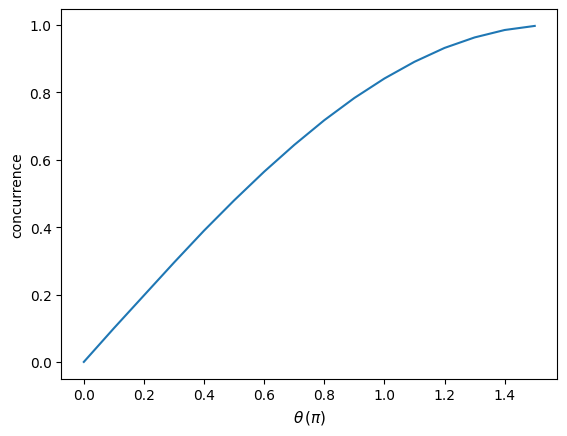

In [57]:
plt.plot(theta,con_list)
plt.xlabel(r"$\theta \, (\pi)$", fontsize=11)
plt.ylabel("concurrence");

### The Original Circuit

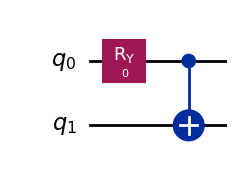

In [58]:
fn_circ(0)[0].draw('mpl')

In [59]:
concurrence(fn_circ(0)[1])

0.0

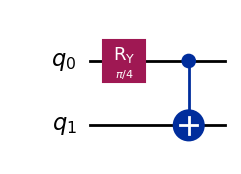

In [60]:
fn_circ(np.pi/4)[0].draw('mpl')

In [61]:
concurrence(fn_circ(np.pi/2)[1])

np.float64(0.9999999937348335)

In [62]:
# qiskit inbuilt function 
theta = np.arange(0,np.pi/2,0.1)
con_list_1 =[]
den_mat_1 = []
for i in range(len(theta)):
        qc,rho =fn_circ(theta[i])
        den_mat_1.append(rho)
        conc=concurrence(fn_circ(theta[i])[1])
        con_list_1.append(conc)

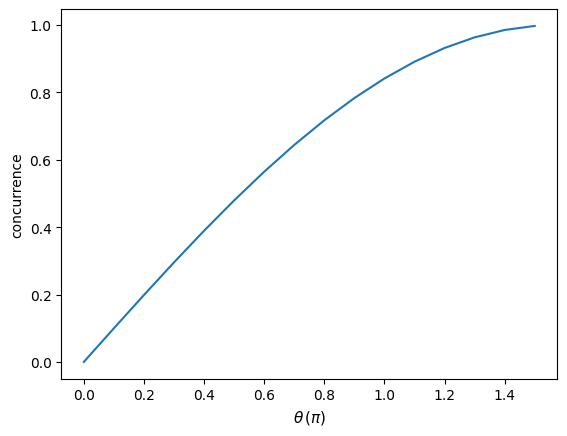

In [63]:
plt.plot(theta,con_list_1)
plt.xlabel(r"$\theta \, (\pi)$", fontsize=11)
plt.ylabel("concurrence");

### Visualizing new Circuit

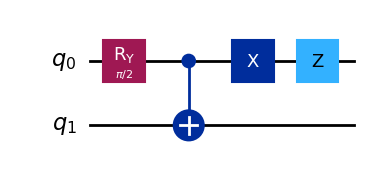

In [64]:
qc1=fn_circ(np.pi/2)[0]
qc1.x(0)
qc1.z(0)
qc1.draw('mpl')

In [65]:
Statevector(qc1) #this object is a way of representing the pure quantum state of your circuit

#Output
#Statevector([...]): The numbers inside are the probability amplitudes of the quantum state
# dims=(2,2) : The system has 2 qubits (each qubit has dimension 2).

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


In [66]:
concurrence(Statevector(qc1))

1.0

## Qiskit Aer and the Estimator primitive to compute the expectation value

In [67]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# --- 1. Define the Pauli observables we want to measure ---
# Each string corresponds to a tensor product of Pauli operators
ZZ=Pauli('ZZ')  # Z ⊗ Z
YY=Pauli('YY')
XX=Pauli('XX')
IZ=Pauli('IZ')
ZI=Pauli('ZI')
IX=Pauli('IX')
XI=Pauli('XI')
IY=Pauli('IY')
YI=Pauli('YI')

# Store all of them in a list for convenience
observables = [ZZ, YY, XX, IZ, ZI, IX, XI, IY, YI]


# --- 2. Create the Estimator primitive ---
# Estimator is used to compute expectation values <ψ|O|ψ>
estimator = Estimator()
 

# --- 3. Transpile the circuit for AerSimulator ---
# Circuits must be translated into gates/instructions the backend supports
# Here we pick optimization_level=1 (light optimization)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=AerSimulator())
isa_circuit = pass_manager.run(qc1) # transpiled version of qc1 (ISA= Instruction Set Architecture)

# --- 4. Define the "publication" (circuit + observable pair) ---
# We pick one observable: observables[2] → 'XX'
pub = (isa_circuit, observables[2])

# --- 5. Run the Estimator job ---
job = estimator.run([pub])                  # submit circuit+observable pair
result = job.result() 
pub_result = result[0]                      # get the result for the first (and only) publication

# --- 6. Extract the expectation value ---
exa_value = float(pub_result.data.evs)
exa_value

-1.0

In [68]:
for i in range(len(observables)):
    pub = (isa_circuit, observables[i])

    job = estimator.run([pub])
    result = job.result()
    pub_result = result[0]
    exa_value = float(pub_result.data.evs)
    print(exa_value)

-1.0
-1.0
-1.0
-2.220446049250313e-16
2.220446049250313e-16
-2.465190328815662e-32
0.0
-2.7369110631344083e-48
0.0


## Original Circuit

In [69]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Pauli

ZZ=Pauli('ZZ')
YY=Pauli('YY')
XX=Pauli('XX')
IZ=Pauli('IZ')
ZI=Pauli('ZI')
IX=Pauli('IX')
XI=Pauli('XI')
IY=Pauli('IY')
YI=Pauli('YI')
observables = [ZZ, YY, XX, IZ, ZI, IX, XI, IY, YI]

estimator = Estimator()
 

# The circuit needs to be transpiled to the AerSimulator target
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=AerSimulator())
isa_circuit = pass_manager.run(fn_circ(0)[0])

pub = (isa_circuit, observables[2])

job = estimator.run([pub])
result = job.result()
pub_result = result[0]
exa_value = float(pub_result.data.evs)
exa_value

0.0

In [70]:
for i in range(len(observables)):
    pub = (isa_circuit, observables[i])
    job = estimator.run([pub])
    result = job.result()
    pub_result = result[0]
    exa_value = float(pub_result.data.evs)
    print(exa_value)

1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0


## Using Parameters in Circuits
Instead of hardcoding rotation angles, we can define parameters that can be assigned later.

This is useful in **variational quantum algorithms (VQAs)**, where parameters are optimized.

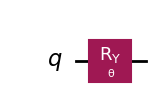

In [71]:
from qiskit.circuit import Parameter

# Define a parameter
theta = Parameter('θ')

# Create a simple parameterized circuit
qc_param = QuantumCircuit(1)
qc_param.ry(theta, 0)
qc_param.draw('mpl')

### Assign Parameter Values

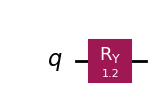

In [72]:
qc_bound = qc_param.assign_parameters({theta: 1.2})
qc_bound.draw('mpl')

### Exercise  - Creat a generalized GHZ State and Compute Purity and Measure Expectation values
 Step 1: Create a circuit with 3 qubits\
 Step 2: Add Ry gate on the first qubit\
 Step 3: Add CNOT gates to create a GHZ state across 3 qubits\
 Step 4: Visualize the circuit

In [73]:
# from qiskit import *
# from qiskit.quantum_info import *
# import numpy as np
# from qiskit.circuit import QuantumCircuit
# from qiskit.quantum_info import DensityMatrix
# from qiskit.circuit import  Parameter

# # your code here








# # Draw circuit
# qc_bound = qc_a.assign_parameters({theta: np.pi/3})
# qc_bound.draw('mpl')

 Step 5: Obtain the density matrix of the GHZ state\
 Step 6: Compute the Purity

In [74]:
# your code here



# print("Purity:", purity_val)

 Step 7: Define different Pauli observables \
 Step 8: Transpile the circuit for AerSimulator backend \
 Step 9: Run Estimator and get expectation values

In [75]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Pauli

# observables (you can add/remove)
ZZI = Pauli('ZZI') 
IZZ = Pauli('IZZ') 
ZIZ = Pauli('ZIZ') 
XYX = Pauli('XYX') 
XYY = Pauli('XYY') 
YXY = Pauli('YXY') 
YYX = Pauli('YYX') 
observables = [ZZI, IZZ, ZIZ, XYX, XYY, YXY, YYX]

# Initialize the Estimator primitive
# Transpile the circuit for AerSimulator
# Define the "publication", Run the Estimator job and Measure  expectation values for all the observables
# your code here






#----------------------------------

# Submit Exercise
https://forms.gle/QzJNPyBodTUtwEm86